In [1]:
# Binary Classifiers Evaluation

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
val=pd.read_csv("fruit_data_with_colors.txt", delimiter='\t')

In [4]:
val=val[(val["fruit_label"]==1) | (val["fruit_label"]==3)]

In [5]:
X=val[["mass", "width", "height"]]
y=val["fruit_label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import LogisticRegression
temp=LogisticRegression(C=1)

temp.fit(X_train, y_train)
pred=temp.predict(X_test)

from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test, pred, labels=[1, 3])
print(con)

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[5 0]
 [1 4]]


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy:", end=" ")
print(accuracy_score(y_test, pred))
print("precision:", end=" ")
print(precision_score(y_test, pred, labels=[1, 3]))
print("recall:", end=" ")
print(recall_score(y_test, pred, labels=[1, 3]))
print("f1 :", end=" ")
print(f1_score(y_test, pred, labels=[1, 3]))

accuracy: 0.9
precision: 0.8333333333333334
recall: 1.0
f1 : 0.9090909090909091


<IPython.core.display.Javascript object>


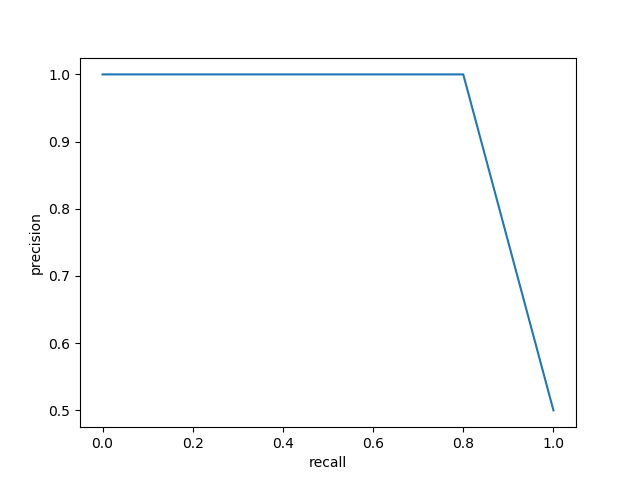

Text(0, 0.5, 'precision')

In [7]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pred, pos_label=3)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")

In [8]:
a=temp.decision_function(X_test)
l=list(zip(y_test, a))
print(l)

[(3, 1.5257138786785736), (3, -0.4327128672904404), (1, -0.3257943650139726), (1, -0.30398221641660733), (1, -0.462642771639517), (3, 1.789731954746577), (3, 0.4185243885017837), (1, -0.8586263669850333), (3, 0.08837611689578698), (1, -0.20217199749602485)]


In [9]:
b=temp.predict_proba(X_test)
m=list(zip(y_test, b))
print(m)

[(3, array([0.17862166, 0.82137834])), (3, array([0.60652129, 0.39347871])), (1, array([0.58073573, 0.41926427])), (1, array([0.57541571, 0.42458429])), (1, array([0.61364093, 0.38635907])), (3, array([0.14310559, 0.85689441])), (3, array([0.3968699, 0.6031301])), (1, array([0.70237358, 0.29762642])), (3, array([0.47792034, 0.52207966])), (1, array([0.55037154, 0.44962846]))]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred,labels=[1,3] ,target_names=['1', '3']))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           3       1.00      0.80      0.89         5

   micro avg       0.90      0.90      0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [11]:
# Dummy Classifier

In [12]:
from sklearn.dummy import DummyClassifier
dum=DummyClassifier(strategy="constant", constant=1)
dum.fit(X_train, y_train)
p=dum.predict(X_test)
c=confusion_matrix(y_test, p, labels=[1, 3])
print(c)

[[5 0]
 [5 0]]


In [13]:
# MultiClass Classifiers Evaluation

In [14]:
val=pd.read_csv("fruit_data_with_colors.txt", delimiter='\t')
X=val[["mass", "width", "height"]]
y=val["fruit_label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.linear_model import LogisticRegression
temp=LogisticRegression(C=1)

temp.fit(X_train, y_train)
pred=temp.predict(X_test)

from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test, pred, labels=[1, 2, 3, 4])
print(con)

[[2 0 2 0]
 [0 1 0 0]
 [5 0 2 1]
 [0 0 0 2]]


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy:", end=" ")
print(accuracy_score(y_test, pred))
print("precision:", end=" ")
print(precision_score(y_test, pred, labels=[1, 2, 3, 4, 5], average="macro"))
print("recall:", end=" ")
print(recall_score(y_test, pred, labels=[1, 2, 3, 4], average="macro"))
print("f1 :", end=" ")
print(f1_score(y_test, pred, labels=[1, 2, 3, 4], average="macro"))

accuracy: 0.4666666666666667
precision: 0.4904761904761904
recall: 0.6875
f1 : 0.6242424242424243


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred,labels=[1, 2, 3, 4] ,target_names=['1', '2', '3', '4']))

              precision    recall  f1-score   support

           1       0.29      0.50      0.36         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.67      1.00      0.80         2

   micro avg       0.47      0.47      0.47        15
   macro avg       0.61      0.69      0.62        15
weighted avg       0.50      0.47      0.45        15



In [17]:
# Regression Evaluation (We use R^2 score )

In [18]:
# Random Forest

In [19]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
val=pd.read_csv("fruit_data_with_colors.txt", delimiter='\t')
val.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [23]:
X=val[["mass", "width", "height"]]
y=val["fruit_label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.ensemble import RandomForestClassifier
temp=RandomForestClassifier(n_estimators=10, max_depth=5)
temp.fit(X_train, y_train)
print(temp.score(X_train, y_train))
print(temp.score(X_test, y_test))

0.9772727272727273
0.5333333333333333


In [24]:
#Gradient Boosting Tree

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
temp=GradientBoostingClassifier(n_estimators=10, max_depth=5, learning_rate=0.1)
temp.fit(X_train, y_train)
print(temp.score(X_train, y_train))
print(temp.score(X_test, y_test))

1.0
0.6


In [26]:
#Neural Networks

In [27]:
from sklearn.neural_network import MLPClassifier
temp=MLPClassifier(hidden_layer_sizes=[120, 120], activation="tanh", alpha=5)
temp.fit(X_train, y_train)
print(temp.score(X_train, y_train))
print(temp.score(X_test, y_test))

0.8181818181818182
0.5333333333333333


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [1]:
# KMeans Clustering

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
val=pd.read_csv("fruit_data_with_colors.txt", delimiter='\t')
val.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [7]:
X=val[["mass", "width", "height", "color_score"]]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

from sklearn.cluster import KMeans
temp=KMeans(n_clusters=4)

temp.fit(X_scaled)
print(temp.labels_)
print(temp.cluster_centers_)

[1 1 1 3 3 3 3 3 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 2 2 2 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.30953257 0.39196676 0.52712551 0.77839335]
 [0.28409091 0.30921053 0.64951923 0.42105263]
 [0.96969697 0.9122807  0.81025641 0.51754386]
 [0.01818182 0.03684211 0.05846154 0.64736842]]


C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
# DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
temp=DBSCAN(eps=0.2, min_samples=5)
temp.fit(X_scaled)
print(temp.labels_)

[-1 -1 -1  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1]
